In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statistics


In [2]:
insurance= pd.read_csv(r"C:/Users/Travel Your Style/Documents/IOD Course 22 June 20/DATA/Insurance.csv", skiprows=list(range(0,5)),
                      header=None,
                      names=['Claims','Total_Payment'])

In [3]:
insurance.head()

,Claims,Total_Payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
insurance.shape

(63, 2)

Text(0.5, 1.0, 'Auto Insurance in Sweden')

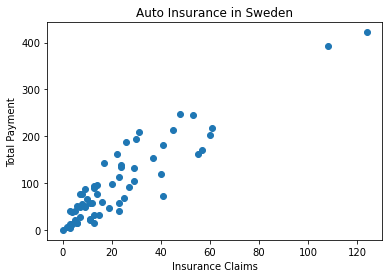

In [5]:
plt.scatter(insurance["Claims"], insurance["Total_Payment"])
plt.xlabel("Insurance Claims")
plt.ylabel("Total Payment")
plt.title("Auto Insurance in Sweden")

In [6]:
#looks strong correlation
insurance.corr()

,Claims,Total_Payment
Claims,1.000000,0.912878
Total_Payment,0.912878,1.000000


In [8]:
#define x & y
X= insurance["Claims"]
Y=insurance["Total_Payment"]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(
...     X,Y, test_size=0.20, random_state=42)

In [10]:
x=X_train
y=Y_train

In [11]:
#calculate mean of Claims (x)
def mean(x):
    return sum(x)/ float(len(x))

In [12]:
print(mean(x))

19.9


In [112]:
mean_x=np.mean(x)
print(mean_x)

19.9


In [99]:
def mean(y):
    return sum(y)/ float(len(y))

print(mean(y))

84.99199999999999


In [113]:
mean_y=np.mean(y)
print(mean_y)

84.992


In [14]:
#The variance is the sum squared difference for each value from the mean value.
#Variance for a list of numbers can be calculated as:
	
#variance = sum( (x - mean(x))**2 )
def variance (values, mean):
	return sum([(x - mean)**2 for x in values])
print(variance)

<function variance at 0x00000209D9A061F8>


In [13]:
var_x=sum((x-mean(x))**2)
var_x

21620.5

In [15]:
def variance(values, mean):
	return sum([(y-mean)**2 for y in values])
print(variance)

<function variance at 0x00000209D9A06558>


In [19]:
mean_x, mean_y=mean(x),mean(y)

In [20]:
#Variance x
var_x=np.var(x)
print(var_x)

432.41


In [21]:
#Variance y
var_y=np.var(y)
print(var_y)

6444.106336000001


In [22]:
var_x, var_y = variance(x, mean_x), variance(y, mean_y)

In [23]:
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=19.900 variance=21620.500
y stats: mean=84.992 variance=322205.317


In [24]:
# Calculate covariance between x and y
#def covariance(x, mean_x, y, mean_y):
#	covar = 0.0
#	for i in range(len(x)):
#		covar += (x[i] - mean_x) * (y[i] - mean_y)
#	return covar
#cacluate covariance
#covar = covariance(x, mean_x, y, mean_y)
#print('Covariance: %.3f' % (covar))

#covar=np.cov(x, mean_x, y, mean_y)

cov_mat = np.stack((x, y), axis = 1) 
print(np.cov(cov_mat)) 

[[ 137.78  1157.85   306.27  ...  173.47   664.      71.38 ]
 [1157.85  9730.125 2573.775 ... 1457.775 5580.     599.85 ]
 [ 306.27  2573.775  680.805 ...  385.605 1476.     158.67 ]
 ...
 [ 173.47  1457.775  385.605 ...  218.405  836.      89.87 ]
 [ 664.    5580.    1476.    ...  836.    3200.     344.   ]
 [  71.38   599.85   158.67  ...   89.87   344.      36.98 ]]


In [28]:
#covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))
#Caclulate Covariance

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar
print(covariance)



#Covariance = np.cov(x, y, bias=True)[0][1]
#print(Covariance)

<function covariance at 0x00000209D9A061F8>


In [30]:
Covariance = np.cov(x, y, bias=True)[0][1]
print(Covariance)

1482.8351999999995


In [31]:
#calculate coefficients
# Calculate coefficients
def coefficients(insurance):
	x = [row[0] for row in insurance]
	y = [row[1] for row in insurance]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]



In [78]:
print(b0,b1)

19.99448575911481 3.4138235600663664


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
linreg=LinearRegression()